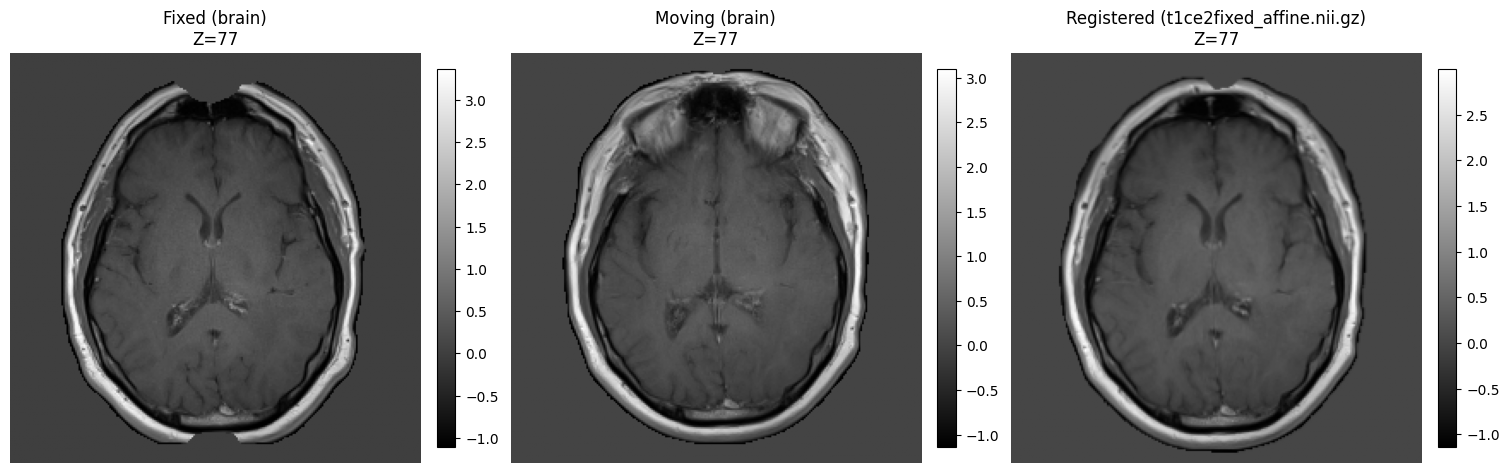

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_registration(case_root, case_id,
                      fixed_date, moving_date,
                      slice_z=111,
                      fixed_mod="t1ce_brain.nii.gz",
                      moving_mod="t1ce_brain.nii.gz",
                      reg_file="t1ce2fixed_affine.nii.gz"):
    """
    case_root:    e.g. "data/btp_reg_linear"
    case_id:      e.g. "PGBM-001"
    fixed_date:   e.g. "04-02-1992"
    moving_date:  e.g. "11-19-1991"
    slice_z:      Z축 인덱스 (None이면 중앙)
    fixed_mod:    고정세션에서 불러올 파일명 (brain 추출된 이미지)
    moving_mod:   정합 전 이동세션 파일명 (brain 추출된 이미지)
    reg_file:     정합된 이동세션 결과 파일명
    """
    fixed_path  = os.path.join(case_root, case_id, fixed_date, fixed_mod)
    moving_path = os.path.join(case_root, case_id, moving_date, moving_mod)
    reg_path    = os.path.join(case_root, case_id, moving_date, reg_file)

    # 불러오기
    fixed = nib.load(fixed_path).get_fdata()
    moving = nib.load(moving_path).get_fdata()
    reg = nib.load(reg_path).get_fdata()

    # 슬라이스 선택
    Z, Y, X = fixed.shape
    z0 = slice_z if slice_z is not None else Z // 2

    fixed_slice  = fixed[z0, :, :]
    moving_slice = moving[z0, :, :]
    reg_slice    = reg[z0, :, :]

    # 그리기
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    for ax, img, title in zip(axes,
                              [fixed_slice, moving_slice, reg_slice],
                              ["Fixed (brain)", "Moving (brain)", f"Registered ({reg_file})"]):
        im = ax.imshow(img, cmap="gray", aspect="equal")
        ax.set_title(f"{title}\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.show()


# ───────── 사용 예 ─────────
case_root   = "/mnt/ssd/brain-tumor-prediction/data/btp_reg_linear_t1ce"
case_id     = "PGBM-001"
fixed_date = "1991-11-19"
moving_date  = "1992-04-02"

# 1) FLIRT 결과 시각화
show_registration(case_root, case_id,
                  fixed_date, moving_date,
                  reg_file="t1ce2fixed_affine.nii.gz")

# (추후 FNIRT 결과가 생기면 이렇게)
# show_registration(case_root, case_id,
#                   fixed_date, moving_date,
#                   reg_file="t1ce2fixed_fnirt.nii.gz")
